<a href="https://colab.research.google.com/github/YM53858/Stock-Market-Analysis/blob/main/Deliverable_3%20-%20Final%20deliverable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Market Analysis - 

### Data Source:
Reading stock data from Yahoo using Yahoo Finance API. For this we have to use a python library called **yfinance** .Yahoo Finance API provides access to more than five years of daily OHLC price data. Also, you can get minutes OHLC data for recent days.Using the Yahoo API (without authentication), you are limited to 2,000 requests per hour per IP or up to a total of 48,000 requests a day.
 

I am using S&P 500 Companies list from this source: https://datahub.io/core/s-and-p-500-companies/r/0.html

### Acknowledgements:

Used Yahoo Finance to get historical data

In [ ]:
import yfinance as yf

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

from datetime import datetime

Firstly we will be requesting stock information with yfinance, and handle that data by creating data  frames using pandas .

In [ ]:
sp500 = pd.read_csv("sp500.csv") # this provides us with S&P 500 Companies Stock Symbols, Names and their corresponding Industrial Sectors
sp500.head(5)

,Symbol,Name,Sector
0,MMM,3M Company,Industrials
1,AOS,A.O. Smith Corp,Industrials
2,ABT,Abbott Laboratories,Health Care
3,ABBV,AbbVie Inc.,Health Care
4,ABMD,ABIOMED Inc,Health Care


selecting 5 random tech companies from S&P 500 companies list

In [ ]:
tech = sp500.loc[sp500["Sector"]=="Information Technology"].sample(5) # selcting tech companies
tech

,Symbol,Name,Sector
248,IBM,International Business Machines,Information Technology
50,ANET,Arista Networks,Information Technology
313,MCHP,Microchip Technology,Information Technology
197,FTNT,Fortinet,Information Technology
252,INTU,Intuit Inc.,Information Technology


### Note:
['IBM', 'ANET', 'MCHP', 'FTNT', 'INTU']

Replace my_stock_list in below cell with the above list to follow the stock analysis that I did in this notebook.

If you want to continue with random tech stock list then ignore the analysis and observe each visualization in a similar way to understand those stocks.

In [ ]:
my_stock_list = tech['Symbol'].to_list()
company_list=[]
for stock in my_stock_list:
    globals()[stock] = yf.Ticker(stock).history(period="5y") # 2 years data till current date
    company_list.append(globals()[stock])

In [ ]:
company_name = tech['Name'].to_list()
company_ticker_symbol = tech['Symbol'].to_list()

for company,com_name,symbol in zip(my_stock_list,company_name,company_ticker_symbol):
    (globals()[company])["Name"] = com_name
    (globals()[company])["Symbol"] = symbol
    
df = pd.concat(company_list, axis=0)

In [ ]:
df.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Name,Symbol
Date,,,,,,,,,
2015-11-06,NaN,NaN,NaN,NaN,NaN,1.3,0,International Business Machines,IBM
2015-11-09,111.482422,111.611755,109.025158,109.372726,8075600.0,0.0,0,International Business Machines,IBM
2015-11-10,109.413160,109.720323,108.410849,109.502075,4520800.0,0.0,0,International Business Machines,IBM
2015-11-11,110.003216,110.092131,108.718003,109.138329,3164800.0,0.0,0,International Business Machines,IBM
2015-11-12,108.879682,108.879682,107.513632,107.537880,4701400.0,0.0,0,International Business Machines,IBM


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6296 entries, 2015-11-06 to 2020-11-06
Data columns (total 9 columns):
Open            6295 non-null float64
High            6295 non-null float64
Low             6295 non-null float64
Close           6295 non-null float64
Volume          6295 non-null float64
Dividends       6296 non-null float64
Stock Splits    6296 non-null int64
Name            6296 non-null object
Symbol          6296 non-null object
dtypes: float64(6), int64(1), object(2)
memory usage: 491.9+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,6295.000000,6295.000000,6295.000000,6295.000000,6.295000e+03,6296.000000,6296.0
mean,129.184380,130.728975,127.597784,129.224208,2.286610e+06,0.007513,0.0
std,72.518111,73.491157,71.481201,72.532058,2.114136e+06,0.092477,0.0
min,23.490000,24.040001,23.160000,23.830000,1.383000e+05,0.000000,0.0
25%,78.599411,79.544663,77.436176,78.633430,1.040500e+06,0.000000,0.0
50%,113.700176,114.535266,112.520427,113.695496,1.646500e+06,0.000000,0.0
75%,154.178052,155.373939,153.198158,154.298843,2.935100e+06,0.000000,0.0
max,356.231318,359.365801,347.510010,353.556030,3.337060e+07,1.630000,0.0


## What was the change in price of a specific stock over time of 5 years?

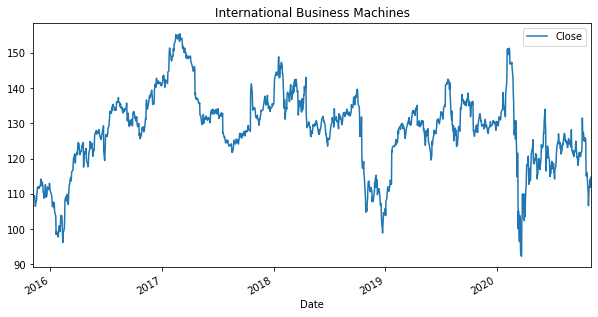

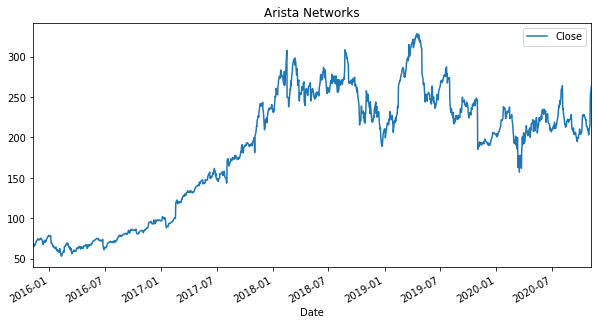

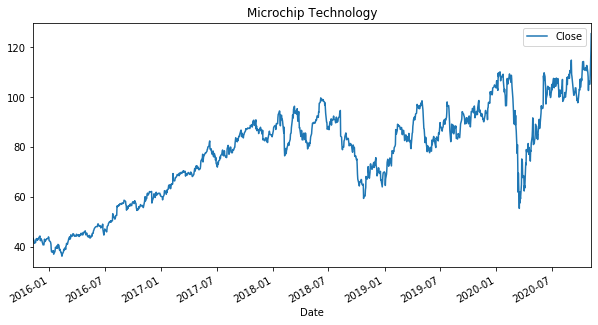

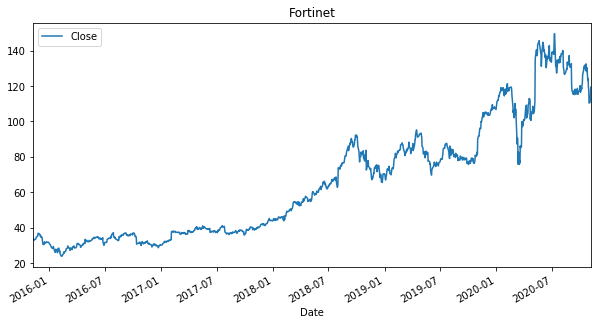

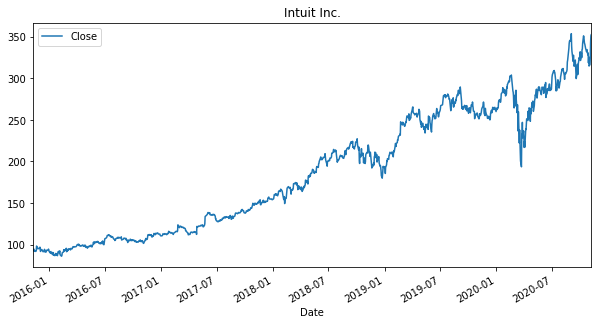

In [ ]:
for company in company_list:
    company[['Close']].plot(figsize=(10,5)).set_title(str(company["Name"][0])) # plotting closing price of each company over the time of five years

## What was the moving average of above listed stocks?

In [ ]:
ma_period = [30, 90, 120]

for period in ma_period:
    for company in company_list:
        new_column = "MA for " + str(period) + " days" 
        company[new_column] = company['Close'].rolling(period).mean() # calculating moving average

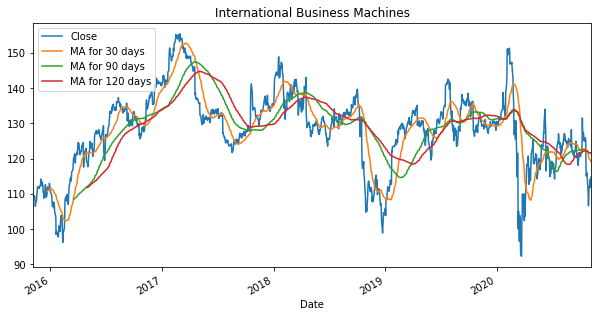

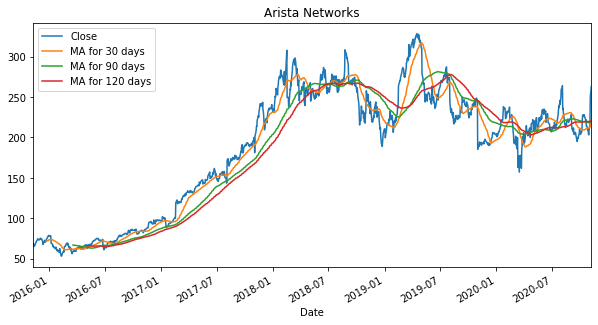

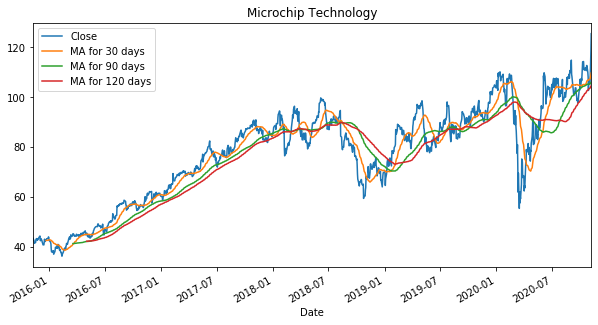

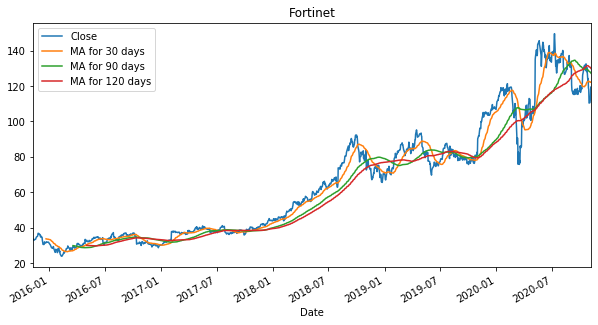

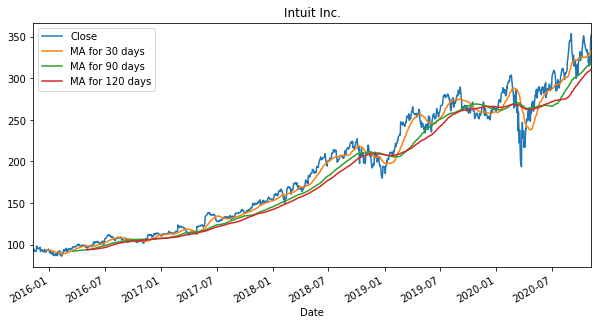

In [ ]:
for company in company_list:
    company[["Close","MA for 30 days","MA for 90 days","MA for 120 days"]].plot(figsize=(10,5)).set_title(str(company["Name"][0]))

## What is the correlation between the above listed stocks?

In [ ]:
stock_open=[]

for company in company_list:
    stock_open.append(company['Open'])

open_df = pd.concat(stock_open,axis=1) 
open_df.columns = [n+" Open" for n in company_ticker_symbol]

In [ ]:
open_df.head()

,IBM Open,ANET Open,MCHP Open,FTNT Open,INTU Open
Date,,,,,
2015-11-06,NaN,NaN,NaN,NaN,NaN
2015-11-09,111.482422,71.040001,43.096742,34.000000,93.662908
2015-11-10,109.413160,68.400002,43.069537,33.200001,92.956923
2015-11-11,110.003216,68.889999,42.806648,33.349998,94.845826
2015-11-12,108.879682,66.970001,42.416842,32.740002,94.607330


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B5C1F50148>,
      dtype=object)

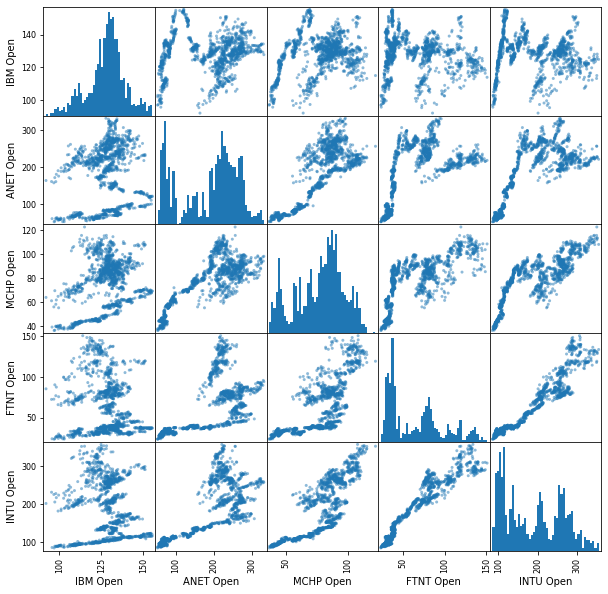

In [ ]:
scatter_matrix(open_df, figsize=(10,10), hist_kwds={'bins':50})

- By looking at scatter matrix, We can say that out of all the companies FORTNITE & INTUIT companies stock prices had a correlation in stock market as their corr scatter plot shows the density in a form of straight line.
- No other company correlation is noticable in this graph.

## How much volume of stocks have been traded every day over the period of 5 years for the above listed companies? 

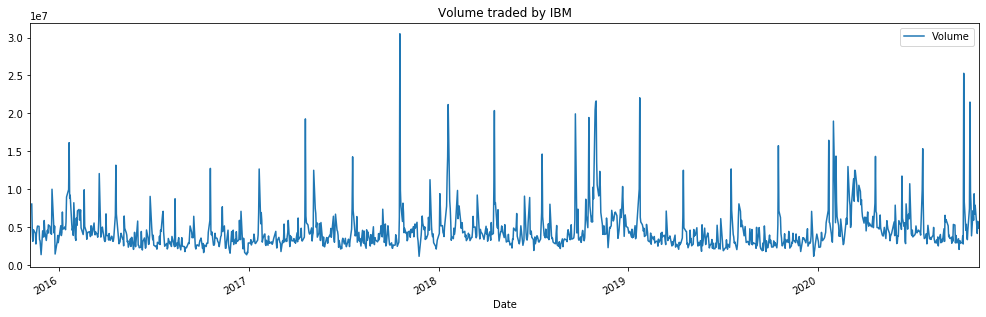

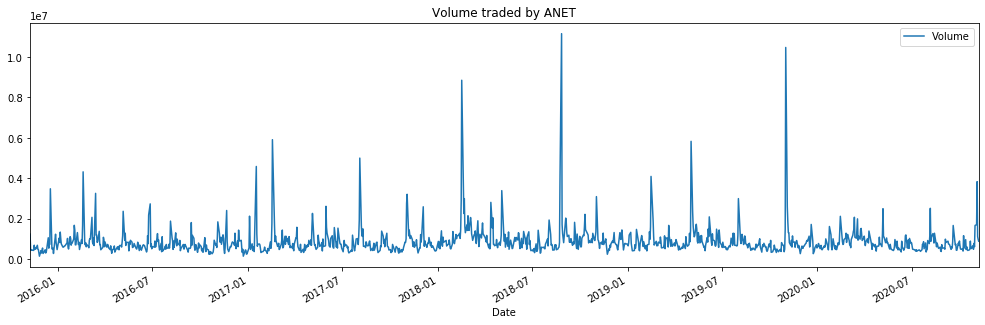

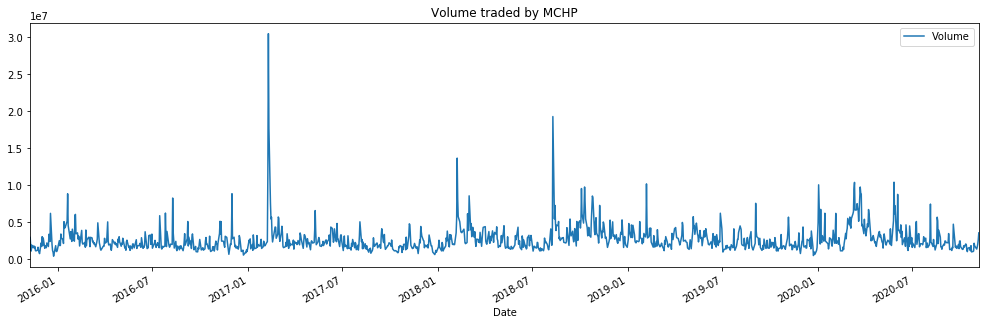

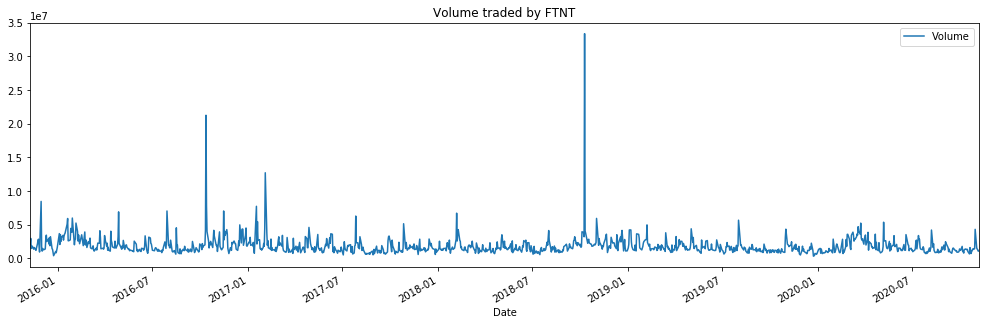

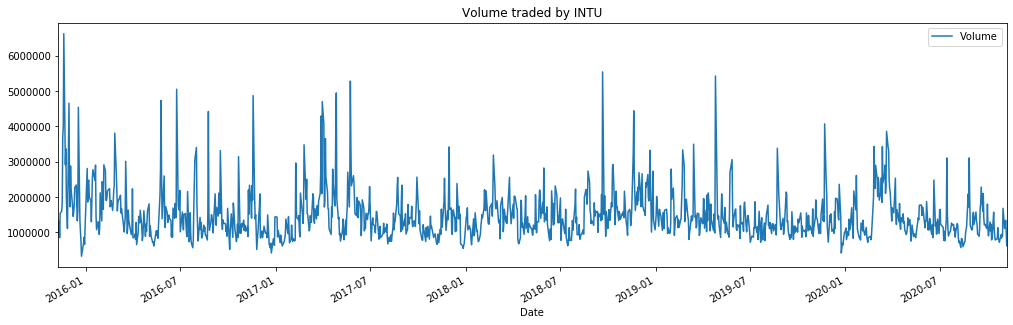

In [ ]:
for company in company_list:
    company[['Volume']].plot(figsize=(17,5)).set_title("Volume traded by "+str(company["Symbol"][0]))

-  If you look at Fortinet companies total volume between 2018-7 and 2019-1 in the above graph, you can  see there's a big spike around the November 2018.
- This is because the stock price has fell during that time and lot of stake holders tried selling and buying the stock resulting in high volume of stockk exchange
- If you want to know more about this please read this article about Fortnite stock during that time period : https://www.fool.com/investing/2018/11/02/why-fortinet-inc-shares-fell-133-today.aspx
- Similarly avery spike in the chart shows that there's a noticeable/big change in price happening during those dates.

## Total money traded on each day over the period of time for the above listed companies?

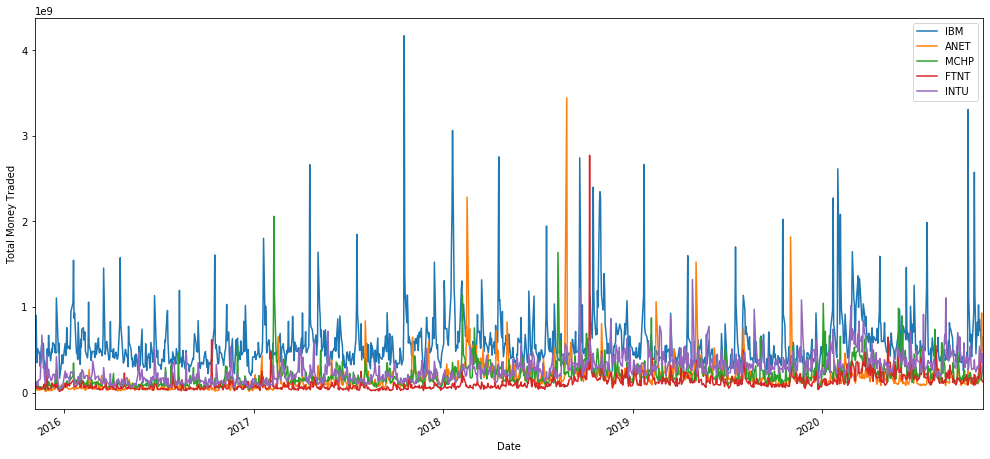

In [ ]:
for company in company_list:
    company["Total Traded"] = company['Open'] * company['Volume'] # Calculating the total money traded.
    company['Total Traded'].plot(figsize=(17,8), label = str(company["Symbol"][0]))
    plt.legend()
    plt.ylabel("Total Money Traded")

The graph looks so clumpsy but you can clearly see that More Money has been traded in the Q4 for IBM and at the start of Q4 for ANET company.

Now lets try to plot them seperately to understand each companies trend seperately

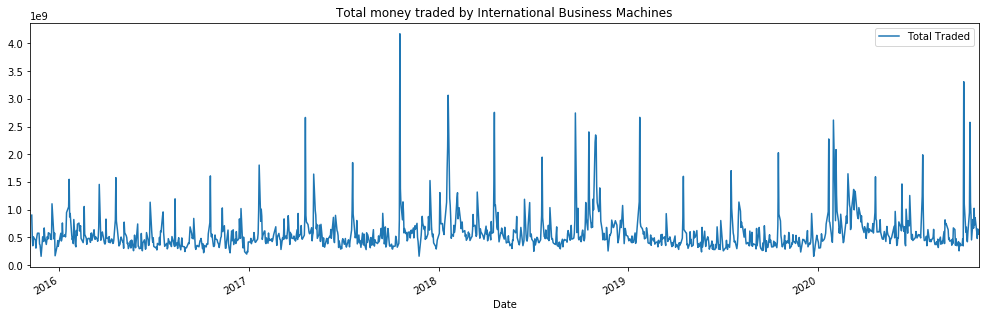

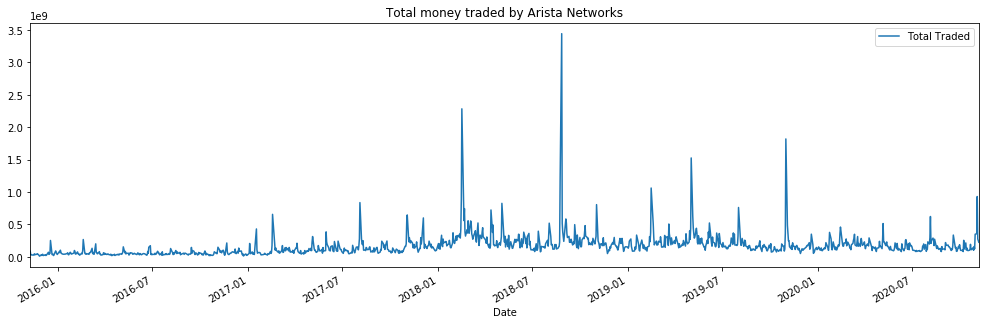

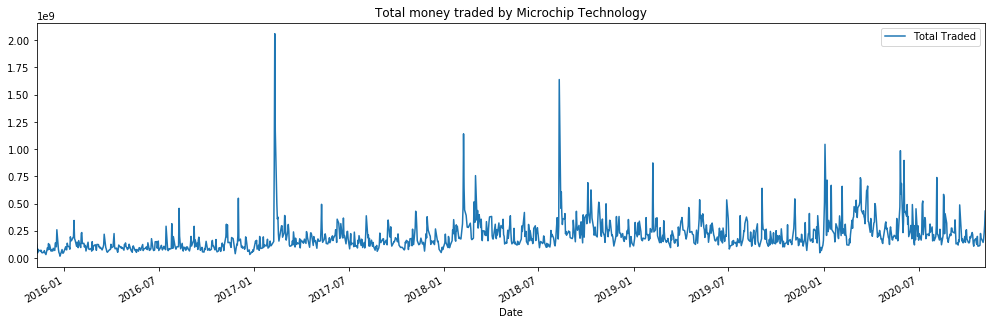

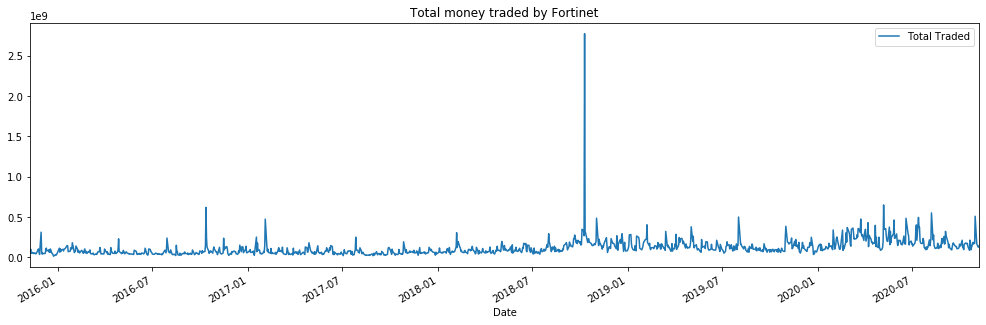

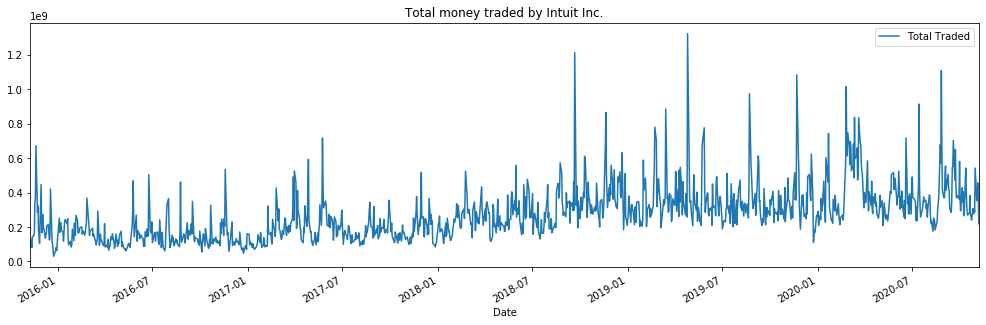

In [ ]:
for company in company_list:
    company["Total Traded"] = company['Open'] * company['Volume']
    company[['Total Traded']].plot(figsize=(17,5)).set_title("Total money traded by "+str(company["Name"][0]))

## What is the daily return of above listed stocks?

r = (P/P-1)-1

P is the price on given date and P-1 is the price on current date - 1.

In [ ]:
for company in company_list:
    company["Daily Return"] = company['Close'].pct_change() # pct_change calculates pct change between this row and previous row
    
company_list[0].head() # To see how the Daily return column is getting populated

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Name,Symbol,MA for 30 days,MA for 90 days,MA for 120 days,Total Traded,Daily Return
Date,,,,,,,,,,,,,,
2015-11-06,NaN,NaN,NaN,NaN,NaN,1.3,0,International Business Machines,IBM,NaN,NaN,NaN,NaN,NaN
2015-11-09,111.482422,111.611755,109.025158,109.372726,8075600.0,0.0,0,International Business Machines,IBM,NaN,NaN,NaN,9.002874e+08,NaN
2015-11-10,109.413160,109.720323,108.410849,109.502075,4520800.0,0.0,0,International Business Machines,IBM,NaN,NaN,NaN,4.946350e+08,0.001183
2015-11-11,110.003216,110.092131,108.718003,109.138329,3164800.0,0.0,0,International Business Machines,IBM,NaN,NaN,NaN,3.481382e+08,-0.003322
2015-11-12,108.879682,108.879682,107.513632,107.537880,4701400.0,0.0,0,International Business Machines,IBM,NaN,NaN,NaN,5.118869e+08,-0.014664


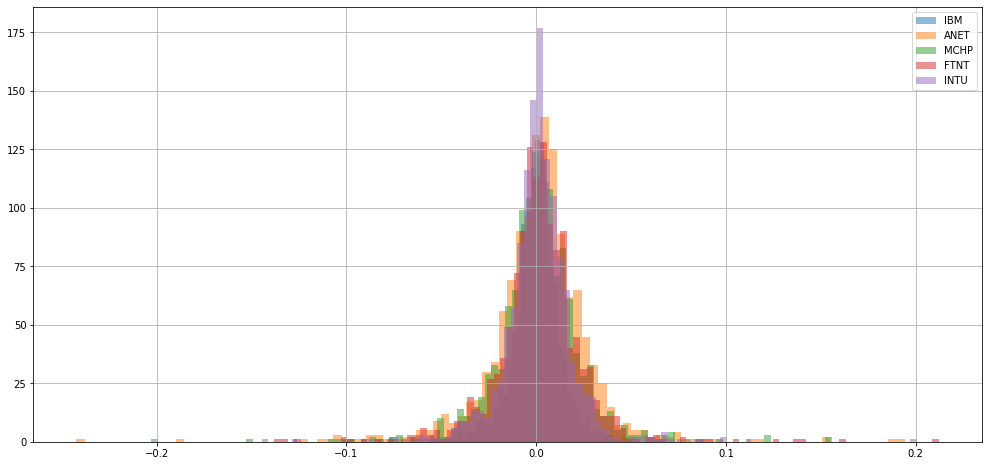

In [ ]:
for company in company_list:
    company["Daily Return"].hist(bins=100,figsize=(17,8),label = str(company["Symbol"][0]),alpha = 0.5)
    plt.legend()

- From the above graph we can say that **INTUIT** company's stock is highly volatile for a short period but **ARTISTA NETWORKS** is volatile for a long period because of more changes in daily returns. [You can understand this better by looking at the next graph]
- Higher the standard deviation Higher the volatility of the stock making that stock highly volatile.
- Volatile stocks if invested carefully will return good profits and at the same time they are very risky as they bring you heavy losses when the price crashes down due to high volatility.

In [ ]:
# if you are confused with the above graph run this cell by uncommenting below code to see seperate graphs

# for company in company_list:
#     company["Daily Return"].hist(bins=100,figsize=(17,8),label = str(company["Symbol"][0]),alpha = 0.5)
#     plt.legend()

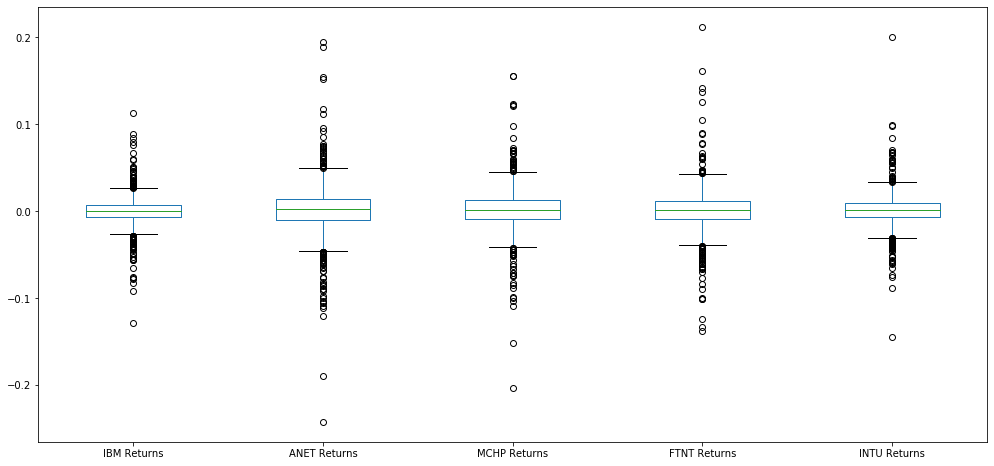

In [ ]:
stock_returns=[]

for company in company_list:
    stock_returns.append(company['Daily Return'])

box_df = pd.concat(stock_returns,axis=1) 

box_df.columns = [n+" Returns" for n in company_ticker_symbol]

box_df.plot(kind="box",figsize=(17,8))

ANET [**ARTISTA NETWORKS**] has a bogger box and more spread meaning that it is highly volatile than other stocks.

## Cumulative Returns or Total returns till current date if invested in it before 5 years?

C = (P/P-1)C-1

Here C is Cumulative return on current date and C-1 is Cumulative return on (current date-1). So we can say that Cumative return is recursively calcualted.

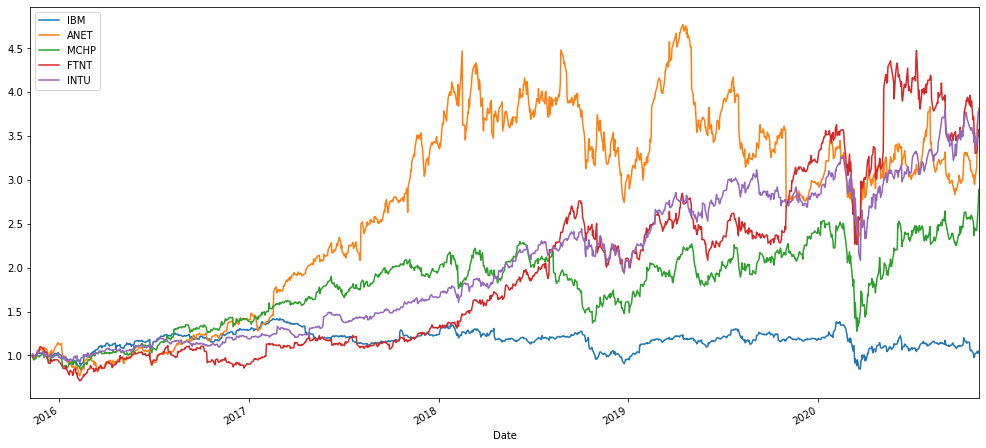

In [ ]:
for company in company_list:
    company["Cumulative Return(5y)"] = (1 + company['Daily Return']).cumprod()

for company in company_list:
    company["Cumulative Return(5y)"].plot(label = str(company["Symbol"][0]), figsize=(17,8))
    plt.legend()

- If you had invested in FORTINET, ARISTA NETWORKS AND  INTUIT companies 5 years back you will get a return of 4 dollars(approx) for every 1 dollar that you have invested making them profitable stocks among these 5 stocks.
- And If you have invested in **ARTISTA NETWORKS** in first quarter of 2016 and sell it in first quarter of 2019 then for every dollar invested you get 4.5 dollars return.  
- IBM company stock returns are almost same from the year 2015 till date. if you had bought IBM stock 5 years back you will have a similar value for your stocks on current date.



<center> <h1> THE END </h1> </center>